In [1]:
import os
import json
import h5py
import random
import operator
import collections
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import skimage.measure

from skimage.transform import resize


import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn.functional as F



import os
import math
os.environ["CUDA_VISIBLE_DEVICES"]="3"

from dataloader.NTURGBDwithFlowLoaderVal import NTURGBDwithFlowLoaderCS, NTURGBDwithFlowLoaderCSValidation,NTURGBDwithFlow

#from dataloader.NTURGBDwithFlowLoader import NTURGBDwithFlowLoader,NTURGBDwithFlow



from tqdm import tqdm

import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

import cv2

import skimage.measure
from skimage.transform import resize


In [17]:


class arg():
    def __init__(self):
        self.target_length = 6
        self.visual_transform = None #"normalize"
        self.batch_size = 1
        self.num_workers = 24
        self.ntu_dir = '/scratch/salik/NTU_top_dir_h5/'
        #self.flow = '/scratch/salik/'

args = arg()

margs = {}
margs['json_file'] = os.path.join(args.ntu_dir, 'ntu_rgbd_videonames_reduced_all.json')
margs['label_file'] = os.path.join(args.ntu_dir, 'ntu_rgbd_action_labels.txt')
margs['flow_h5_dir'] = os.path.join(args.ntu_dir, 'Extracted3DFlowH5')
margs['rgb_h5_dir'] = os.path.join(args.ntu_dir, 'nturgb+d_rgb_pngs_320x240_lanczos_h5')
margs['depth_h5_dir'] = os.path.join(args.ntu_dir, 'MaskedDepthMaps_320x240_h5')
margs['flow_sm_h5_dir'] = os.path.join(args.ntu_dir, 'Extracted3DFlowH5_smm')

train_loader, train_dataset = NTURGBDwithFlowLoaderCS(
    json_file=margs['json_file'], 
    label_file=margs['label_file'], 
    rgb_h5_dir=margs['rgb_h5_dir'], 
    depth_h5_dir=margs['depth_h5_dir'], 
    flow_h5_dir=margs['flow_h5_dir'], 
    target_length=args.target_length, 
    subset='train', 
    visual_transform=args.visual_transform, 
    batch_size=args.batch_size, 
    shuffle=False, 
    num_workers=args.num_workers, 
    pin_memory=True
    ) 

=======actual videonames=========== 40320
========total data========== 506727
NTURGBDwithFlow is initialized. (Subset: train, Length: 506727)


In [18]:
#sample = train_dataset[28130]


In [22]:
#sample = train_dataset.__getitem__(16534)
sample = train_dataset[22229]
rgb = sample ['rgbs']
depth = sample ['depths']
depthother = sample ['otherview_depths']
depthother2 = sample ['otherview2_depths']
flow = sample ['flows']
flowActual = sample['flowsActual']
flowother = sample['otherview_flows']
flowother2 = sample['otherview2_flows']

print("flow=\t\t",flow.shape)
print("flowActual=\t",flowActual.shape)
print("flowother=\t",flowother.shape)
print("flowother2=\t",flowother2.shape)
print("depth=\t\t",depth.shape)
print("depthother=\t",depthother.shape)

flow=		 torch.Size([6, 3, 28, 28])
flowActual=	 torch.Size([6, 3, 224, 224])
flowother=	 torch.Size([6, 3, 28, 28])
flowother2=	 torch.Size([6, 3, 28, 28])
depth=		 torch.Size([6, 1, 224, 224])
depthother=	 torch.Size([6, 1, 224, 224])


In [23]:
images = []
depths = []
depthso = []
depthso2 = []
flows = []
flowso = []
flowso2 = []
flowsActual = []

multiplier = 10
for x,image in enumerate(rgb):
    images.append( cv2.cvtColor(image.numpy().transpose(1, 2, 0), cv2.COLOR_BGR2RGB) )
    #print(image.shape)
for x,image in enumerate(depth):
    #print(image.shape)
    depths.append( np.squeeze(image.numpy(),axis=0))
    #print(image.shape)
for x,image in enumerate(depthother):
    #print(image.shape)
    depthso.append( np.squeeze(image.numpy(),axis=0))
    #print(image.shape)
for x,image in enumerate(depthother2):
    #print(image.shape)
    depthso2.append( np.squeeze(image.numpy(),axis=0))
    #print(image.shape)
for x,image in enumerate(flowother):
    #print(image.shape)
    flowso.append( image.numpy().transpose(1, 2, 0)*multiplier )
    #print(image.shape)
for x,image in enumerate(flowother2):
    #print(image.shape)
    flowso2.append( image.numpy().transpose(1, 2, 0)*multiplier )
    #print(image.shape)
for x,image in enumerate(flow):
    #print(image.shape)
    flows.append( image.numpy().transpose(1, 2, 0)*multiplier )
    print(np.shape(flows))
    
for x,image in enumerate(flowActual):
    #print(image.shape)
    '''    image2 = np.transpose(image, (0, 2, 1))
    image2 = F.interpolate(image2, 28)
    image2 = np.transpose(image2, (0, 2, 1))
    image2 = F.interpolate(image2,28)'''
    #image2 = resize(image, (3,28, 28))
    #flowsActual.append( image2.transpose(1, 2, 0)1000 )
    #print(image2.shape)
    flowsActual.append( image.numpy().transpose(1, 2, 0)*multiplier )
    print(np.shape(flowsActual))

(1, 28, 28, 3)
(2, 28, 28, 3)
(3, 28, 28, 3)
(4, 28, 28, 3)
(5, 28, 28, 3)
(6, 28, 28, 3)
(1, 224, 224, 3)
(2, 224, 224, 3)
(3, 224, 224, 3)
(4, 224, 224, 3)
(5, 224, 224, 3)
(6, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


24.017612
100.03163


torch.Size([6, 3, 224, 224])

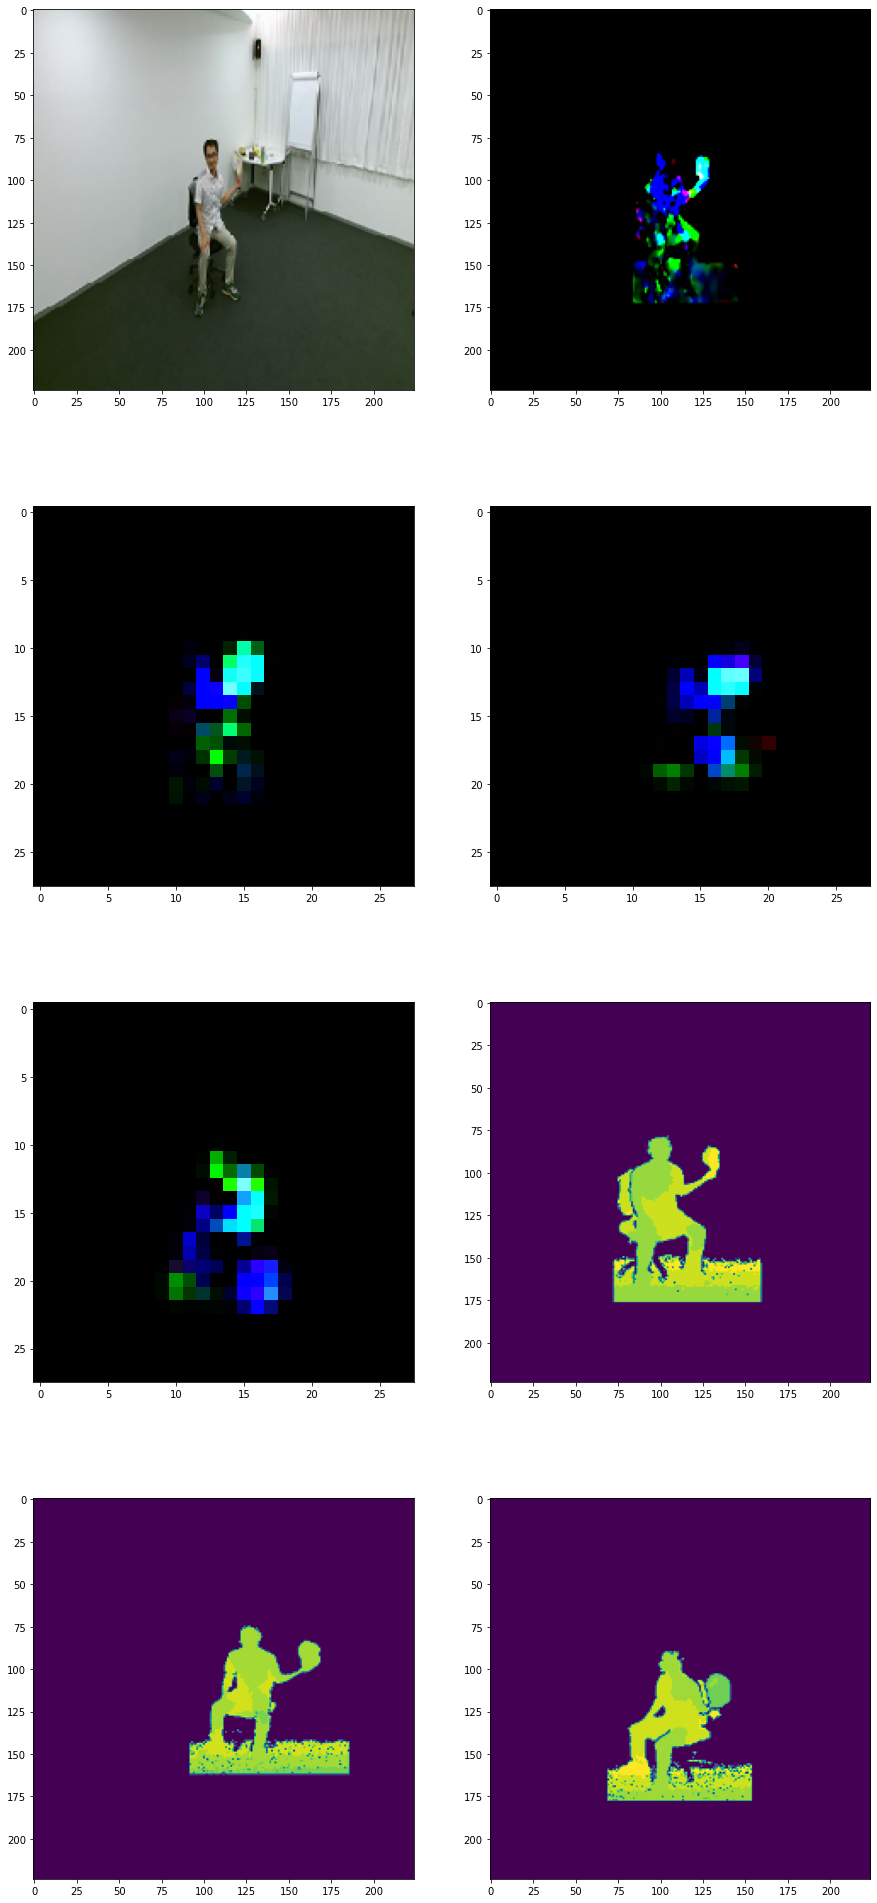

In [24]:
#print(np.shape(depths))

figure, axes = plt.subplots(nrows=4, ncols=2,figsize=(15, 35))

axes[0][0].imshow(images[1])
#axes[0].imshow(flows[1])
axes[0][1].imshow(flowsActual[1])
axes[1][0].imshow(flows[1])
axes[1][1].imshow(flowso[1])

axes[2][0].imshow(flowso2[1])

axes[2][1].imshow(depths[1])
axes[3][0].imshow(depthso[1])
axes[3][1].imshow(depthso2[1])




print(flows[0].max())
print(flowsActual[0].max())


'''for f in flows:
    for g in f:
        print(g)'''


np.shape(flowActual)

In [ ]:
def plot_figures(images,target_length=6):
    import numpy as np
    fig, axs = plt.subplots(1, 6, sharex='col', sharey='row',
                            gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(12, 10), dpi=80)
    (ax1, ax2 , ax3,ax4,ax5,ax6) = axs
    if not np.shape(images)[-1] == 3:
        ax1.imshow(images[0],cmap='gray')
        ax2.imshow(images[1],cmap='gray')
        ax3.imshow(images[2],cmap='gray')
        ax4.imshow(images[3],cmap='gray')
        ax5.imshow(images[4],cmap='gray')
        ax6.imshow(images[5],cmap='gray')
    else:
        ax1.imshow(images[0])
        ax2.imshow(images[1])
        ax3.imshow(images[2])
        ax4.imshow(images[3])
        ax5.imshow(images[4])
        ax6.imshow(images[5])
            
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    ax4.axis('off')
    ax5.axis('off')
    ax6.axis('off')
    return 
plot_figures(images)
plot_figures(depths)
plot_figures(flows)
plot_figures(flowsActual)
plot_figures(depthso)
plot_figures(flowso)
plot_figures(depthso2)
plot_figures(flowso2)

print(np.min(flows[0]) )
print(np.max(flows[0]) )

print(np.shape(flows[0].transpose(2, 0, 1)))

flowsTest = flows[0].transpose(2, 0, 1)

print(flowsTest[0].shape)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

soa = np.array([[0, 0, 1, 1, -2, 0], [0, 0, 2, 1, 1, 0],
                [0, 0, 3, 2, 1, 0], [0, 0, 4, 0.5, 0.7, 0]])

X, Y, Z, U, V, W = zip(*soa)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)
ax.set_xlim([-2, 5.5])
ax.set_ylim([-2, 5.5])
ax.set_zlim([-1, 10])
plt.show()
print(np.shape(soa))

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

vectors=np.array( [ [0,0,1,1,-2,0], [0,0,2,1,1,0],[0,0,3,2,1,0],[0,0,4,0.5,0.7,0]]) 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for vector in vectors:
    v = np.array([vector[3],vector[4],vector[5]])
    vlength=np.linalg.norm(v)
    ax.quiver(vector[0],vector[1],vector[2],vector[3],vector[4],vector[5],
            pivot='tail',length=vlength,arrow_length_ratio=0.3/vlength)
ax.set_xlim([-4,4])
ax.set_ylim([-4,4])
ax.set_zlim([0,4])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

vectors.shape

In [ ]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-1, 1, 5),
                      np.arange(-1, 1, 5),
                      np.arange(-1, 1, 5))

# Make the direction data for the arrows
u = flowsTest[0]
v = flowsTest[1]
w = flowsTest[2]

ax.quiver(x, y, z, u, v, w, length=0.005, normalize=False)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

points = [[0.65612, 0.53440, 0.24175],
           [0.62279, 0.51946, 0.25744],
           [0.61216, 0.53959, 0.26394]]

p0, p1, p2 = points
x0, y0, z0 = p0
x1, y1, z1 = p1
x2, y2, z2 = p2

ux, uy, uz = u = [x1-x0, y1-y0, z1-z0]
vx, vy, vz = v = [x2-x0, y2-y0, z2-z0]

u_cross_v = [uy*vz-uz*vy, uz*vx-ux*vz, ux*vy-uy*vx]

point  = np.array(p0)
normal = np.array(u_cross_v)

d = -point.dot(normal)

xx, yy = np.meshgrid(range(10), range(10))

z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Define constants
h = 28
A = 5
eta = 10

# Define domain
x, y, z = np.meshgrid(((np.arange(0, h, 1))),((np.arange(0, h, 1))),np.zeros(len(np.arange(0, h, 1))))

#x = np.arange(0, 28, 1)
#y = np.arange(0, 28, 1)
#xx, yy = np.meshgrid(x, y, sparse=True)

'''x = np.arange(0, 28, 1)
y = np.arange(0, 28, 1)
z = np.arange(0,28,1)
z.shape'''

# Define vector field
u = nflow[0]
v = nflow[1]
w = nflow[2]

# Plot the field
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.quiver(x, y, z, u, v, w)
plt.show()
'''for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.01)'''

In [ ]:
nflow=flows[1].transpose(2,1,0)
nflow.min()

In [ ]:
nflow[1].reshape(28*28).shape

In [ ]:
x = np.arange(0, 28, 1)
y = np.arange(0, 28, 1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sin(xx**2 + yy**2) // (xx**2 + yy**2)
plt.contourf(x,y,z)

In [ ]:
z = np.arange(-1, 1, 0.073)
z.shape

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
def f(x, y):
   return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(0, 27, 28)
y = np.linspace(0, 27, 28)

X, Y = np.meshgrid(x, y)
Z = [(nflow[0],nflow[1],nflow[2])]
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe')
plt.show()

In [ ]:
np.linspace(0, 27, 28)

In [ ]:
def plot_figures(images,target_length):
    import numpy as np
    fig, axs = plt.subplots(1, 6, sharex='col', sharey='row',
                            gridspec_kw={'hspace': 0, 'wspace': 0}, figsize=(12, 10), dpi=80)
    (ax1, ax2 , ax3,ax4,ax5,ax6) = axs
    if not np.shape(images)[-1] == 3:
        ax1.imshow(images[0],cmap='gray')
        ax2.imshow(images[1],cmap='gray')
        ax3.imshow(images[2],cmap='gray')
        ax4.imshow(images[3],cmap='gray')
        ax5.imshow(images[4],cmap='gray')
        ax6.imshow(images[5],cmap='gray')
    else:
        ax1.imshow(images[0])
        ax2.imshow(images[1])
        ax3.imshow(images[2])
        ax4.imshow(images[3])
        ax5.imshow(images[4])
        ax6.imshow(images[5])
    
    ax1.axis('off')
    ax2.axis('off')
    ax3.axis('off')
    ax4.axis('off')
    ax5.axis('off')
    ax6.axis('off')
    return 
plot_figures(images,args.target_length)
plot_figures(depths,args.target_length)
plot_figures(flows,args.target_length)
plot_figures(flowsActual,args.target_length)

In [ ]:
count = 0
for x in range(2):
    sample = get_sample(x,videonames_sequences,rgb_transform)
    flow = sample ['flows']
    #print(flow.shape)
    for f in flow:
        count = count +1
        if count % 100 == 0:
            print(count)
        if not f.max() == 0. :
            print(f.max())


    
print(count)    

In [ ]:
import os
import math
os.environ["CUDA_VISIBLE_DEVICES"]="1"
from dataloader.NTURGBDwithFlowLoaderVal import NTURGBDwithFlowLoader, NTURGBDwithFlowLoaderValidation
from tqdm import tqdm
import torch

In [ ]:
class arg():
    def __init__(self):
        self.target_length = 6
        self.visual_transform = None
        self.batch_size = 32
        self.num_workers = 24
        self.ntu_dir = '/scratch/salik/NTU_top_dir_h5/'

args = arg()

margs = {}
margs['json_file'] = os.path.join(args.ntu_dir, 'ntu_rgbd_videonames.min.json')
margs['label_file'] = os.path.join(args.ntu_dir, 'ntu_rgbd_action_labels.txt')
margs['flow_h5_dir'] = os.path.join(args.ntu_dir, 'Extracted3DFlowH5')
margs['rgb_h5_dir'] = os.path.join(args.ntu_dir, 'nturgb+d_rgb_pngs_320x240_lanczos_h5')
margs['depth_h5_dir'] = os.path.join(args.ntu_dir, 'MaskedDepthMaps_320x240_h5')
margs['flow_sm_h5_dir'] = os.path.join(args.ntu_dir, 'Extracted3DFlowH5_sm')

train_loader, train_dataset = NTURGBDwithFlowLoader(
    json_file=margs['json_file'], 
    label_file=margs['label_file'], 
    rgb_h5_dir=margs['rgb_h5_dir'], 
    depth_h5_dir=margs['depth_h5_dir'], 
    flow_h5_dir=margs['flow_h5_dir'], 
    flow_sm_h5_dir=margs['flow_sm_h5_dir'], 
    target_length=args.target_length, 
    subset='train', 
    visual_transform=args.visual_transform, 
    batch_size=args.batch_size, 
    shuffle=True, 
    num_workers=args.num_workers, 
    pin_memory=True
    ) 




'''for data in loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples'''



In [ ]:

nimages = 0
mean = 0.0
var = 0.0


min_actual = math.inf
min_flow = math.inf
min_other = math.inf
min_other2 = math.inf
#count = 0
for batch_ind, sample in enumerate(tqdm(train_loader)):
    #print("Actual=",sample['flowsActual'].shape)
    
    #print(sample['flowsActual'].shape)
    data = sample['flowsActual']
    data = data.view(args.target_length*args.batch_size, data.size(2), -1)

    # Compute mean and std here
    mean += data.mean(2).sum(0) 
    var += data.var(2).sum(0)
    nimages += (args.target_length*args.batch_size)
    
    
    #print(data.shape)
    if sample['flowsActual'].min() < min_actual:
        #print("Actual min=",(sample['flowsActual'].min() ) )
        min_actual = sample['flowsActual'].min()
    #print(sample['flows'].shape)
    if sample['flows'].min() < min_flow:
        #print("flows min=",(sample['flows'].min() ) )
        min_flow = sample['flows'].min()
    #print(sample['otherview_flows'].shape)
    if sample['otherview_flows'].min() < min_other:
        #print("otherview_flows min=",(sample['otherview_flows'].min() ) )
        min_other = sample['otherview_flows'].min()
    #print(sample['otherview2_flows'].shape)
    if sample['otherview2_flows'].min() < min_other2:
        #print("otherview2_flows min=",(sample['otherview2_flows'].min() ) )
        min_other2 = sample['otherview2_flows'].min()
    #if batch_ind % 1000 == 0:
        #print("data=",batch_ind,"/",506727)
    #print(batch_ind)
    #count +=1

mean /= nimages
var /= nimages
std = torch.sqrt(var)

print(mean)
print(std)

In [ ]:
print("Actual min=",(sample['flowsActual'].min() ) )
print("flows min=",(sample['flows'].min() ) )
print("otherview_flows min=",(sample['otherview_flows'].min() ) )
print("otherview2_flows min=",(sample['otherview2_flows'].min() ) )

In [ ]:
print("Actual min=",(sample['flowsActual'].min() ) )
print("flows min=",(sample['flows'].min() ) )
print("otherview_flows min=",(sample['otherview_flows'].min() ) )
print("otherview2_flows min=",(sample['otherview2_flows'].min() ) )

In [ ]:
sample = train_dataset.__getitem__(28130)

In [ ]:
rgb = sample ['rgbs']
depth = sample ['depths']
flow = sample ['flows']
flowActual = sample['flowsActual']

In [ ]:

images = []
depths = []
flows = []
flowsActual = []
for x,image in enumerate(rgb):
    #print(image.shape)
    images.append( cv2.cvtColor(image.numpy().transpose(1, 2, 0), cv2.COLOR_BGR2RGB) )
for x,image in enumerate(depth):
    #print(image.shape)
    depths.append( np.squeeze(image.numpy(),axis=0))
    
for x,image in enumerate(flow):
    #print(image.shape)
    flows.append( image.numpy().transpose(1, 2, 0)*10000 )
    
for x,image in enumerate(flowActual):
    #print(image.shape)
    '''    image2 = np.transpose(image, (0, 2, 1))
    image2 = F.interpolate(image2, 28)
    image2 = np.transpose(image2, (0, 2, 1))
    image2 = F.interpolate(image2,28)'''
    #image2 = resize(image, (3,28, 28))
    #flowsActual.append( image2.transpose(1, 2, 0)*10000 )
    #print(image2.shape)
    flowsActual.append( image.numpy().transpose(1, 2, 0)*100 )


In [ ]:
#print(np.shape(depths))

plt.imshow(flowsActual[1],cmap='gray')


print(flowsActual[0].min())

np.shape(flowsActual)